In [30]:
import os
import numpy as np
import yt
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.axes_grid1 import ImageGrid,make_axes_locatable, axes_size
import seaborn as sns


yt.__version__

# # assume that our data is in CGS
# from yt.units import cm, amu
# from yt.frontends.boxlib.api import MaestroDataset

'4.2.dev0'

In [31]:
# figure out last file
# run_dir = "../"
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/"
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN4/"
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN7/"
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN8/"
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN9/"
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN10/"
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN11/"
# run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN12/"
run_dir = os.environ.get("PSCRATCH")+"/xrb_layered/RUN13/"


plotfiles = glob.glob(run_dir+"PLOTS/xrb*")
plotfiles = [file for file in plotfiles if "old" not in file]
Nums = [int(file.split("_")[-1]) for file in plotfiles if ("after" not in file and "Init" not in file)]
Nlast = max(Nums)
ds1 = yt.load(run_dir+"PLOTS/xrb_0000000", hint="maestro")
ds2 = yt.load(run_dir+"PLOTS/xrb_%07d"%Nlast, hint="maestro")

print(f"Last plotfile #{Nlast}, simulation time {ds2.current_time:.3e}")


# 
# ds1 = yt.load(run_dir+"PLOTS/xrb_InitData", hint="maestro")
# ds2 = yt.load(run_dir+"PLOTS/xrb_after_InitProj", hint="maestro")

Last plotfile #156337, simulation time 3.830e-02 code_time


In [22]:
ds2.print_stats()
print(ds2.field_list)
# ds2.derived_field_list

# field widget tab
# ds2.fields

# some info might need to get

# model
# ds2.current_time
# ds2.timestep # doesn't exist

# dimensions
# ds2.domain_dimensions
# ds2.domain_right_edge  # actually right and top

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	    64	        262144	            64
----------------------------------------------
   	    64	        262144


t = 3.83000113e-02 = 3.83000113e-02 s = 1.21365412e-09 years

Smallest Cell:
	Width: 1.944e-24 Mpc Mpc
	Width: 1.944e-18 pc pc
	Width: 4.011e-13 AU AU
	Width: 6.000e+00 cm cm
[('boxlib', 'Hnuc'), ('boxlib', 'MachNumber'), ('boxlib', 'Pi'), ('boxlib', 'S'), ('boxlib', 'X(c12)'), ('boxlib', 'X(c13)'), ('boxlib', 'X(f17)'), ('boxlib', 'X(f18)'), ('boxlib', 'X(f19)'), ('boxlib', 'X(fe56)'), ('boxlib', 'X(h1)'), ('boxlib', 'X(he4)'), ('boxlib', 'X(mg22)'), ('boxlib', 'X(mg24)'), ('boxlib', 'X(n13)'), ('boxlib', 'X(n14)'), ('boxlib', 'X(n15)'), ('boxlib', 'X(ne18)'), ('boxlib', 'X(ne19)'), ('boxlib', 'X(ne20)'), ('boxlib', 'X(o14)'), ('boxlib', 'X(o15)'), ('boxlib', 'X(o16)'), ('boxlib', 'X(o17)'), ('boxlib', 'X(o18)'), ('boxlib', 'abar'), ('boxlib', 'ad_excess'), ('boxlib', 'conductivity

In [32]:
# Compare beginning and end

def compare_one_var(var_name, use_log=False, minimum=None, maximum=None, cmap='viridis', DS1=None, DS2=None):
    fig = plt.figure()
    grid = ImageGrid(fig, (0.075,0.075,0.85,0.85),
        nrows_ncols = (1,2),
        label_mode = "L",
        share_all = True,
        axes_pad = 1.0,
        cbar_location="right",
        cbar_mode="each",
        cbar_size="3%",
        cbar_pad="0%")
    
    if minimum is None:
        minimum = 'min'
    if maximum is None:
        maximum = 'max'
        
    if DS1 is None: DS1 = ds1
    if DS2 is None: DS2 = ds2
 
    for i,ds in enumerate((DS1,DS2)):
        plot = yt.SlicePlot(ds, 'z', var_name)
        plot.set_cmap(var_name, cmap)
        p = plot.plots[var_name]
        p.figure = fig
        p.axes = grid[i].axes
        p.cax = grid.cbar_axes[i]
        p.cax.set_label("")
        plot.set_zlim(var_name, minimum, maximum)
        plot.set_log(var_name, use_log)
        # print(plot.get_zlim(var_name))
        plot._setup_plots()
        
    # return fig

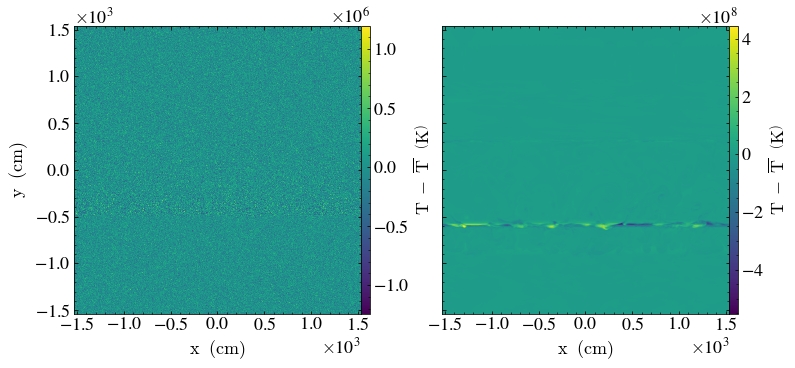

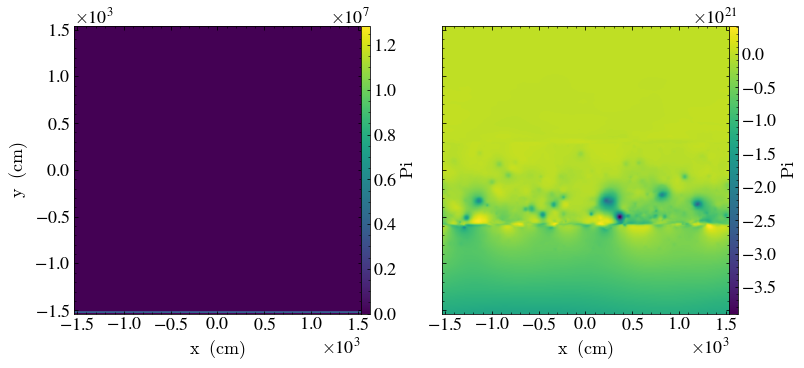

In [44]:
# stop yt verbose
yt.set_log_level(50)

# compare_one_var('abar', use_log=True)
# compare_one_var('X(h1)')
# compare_one_var('X(he4)', cmap='viridis', minimum=0, maximum=1)
# compare_one_var('X(c12)')
# compare_one_var('X(c13)')
# compare_one_var('X(n13)')
# compare_one_var('X(o18)')
# compare_one_var('X(f17)')
# compare_one_var('X(mg24)')
# compare_one_var('X(fe56)')

# compare_one_var('omegadot(h1)')
# compare_one_var('omegadot(he4)')
# compare_one_var('omegadot(c12)')
# compare_one_var('omegadot(c13)')
# compare_one_var('omegadot(n13)')
# compare_one_var('omegadot(o18)')
# compare_one_var('omegadot(f17)')
# compare_one_var('omegadot(mg24)')
# compare_one_var('omegadot(fe56)')

# compare_one_var('rho', use_log=True)
# compare_one_var('rho0', use_log=True)
# compare_one_var('Hnuc', use_log=True, cmap='inferno', minimum=1e14, maximum=1e18)
# compare_one_var('Hnuc', use_log=False, cmap='inferno')

# compare_one_var('velx', cmap='cividis')
# compare_one_var('vely', cmap='cividis')
# compare_one_var('vort', cmap='cividis')
# compare_one_var('vort', cmap='cividis', minimum=-2e5, maximum=2e5)
# compare_one_var('MachNumber', cmap='cividis')

# compare_one_var('tfromp', use_log=True, cmap='hot')
# compare_one_var('tfromp', use_log=False, cmap='hot')
# compare_one_var('tfromp', use_log=False, cmap='hot', minimum=2e8,maximum = 1e9)
# compare_one_var(('gas','temperature'), use_log=False) # same!

# compare_one_var('tfromp', use_log=False, cmap='hot', minimum=4e8,maximum=4.1e8)
compare_one_var('tpert', use_log=False)
# compare_one_var('tpert', use_log=False, minimum=5e5, maximum=6e5)
compare_one_var('Pi')

# compare_one_var('entropy', cmap='cividis')
# compare_one_var('ad_excess', cmap='cividis', minimum=0, maximum=2)
# compare_one_var('ad_excess', cmap='bwr', minimum=-1, maximum=1)

# compare_one_var('sponge')

# fig1=compare_one_var('rho', use_log=True)
# fig2=compare_one_var('sponge')
# fig1.savefig('rho.png',bbox_inches='tight',dpi=500)
# fig2.savefig('sponge.png',bbox_inches='tight',dpi=500)

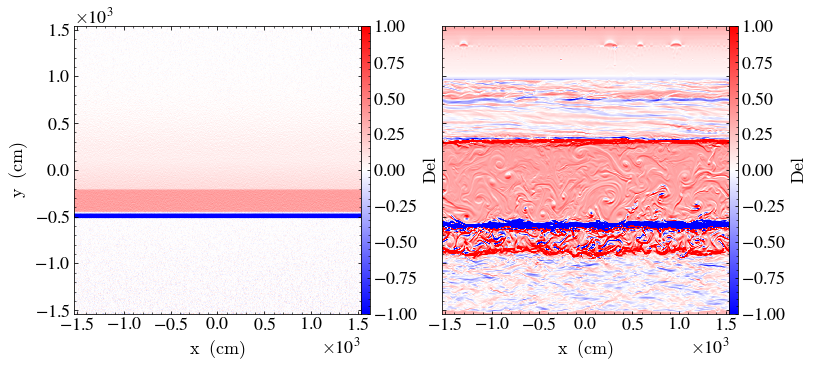

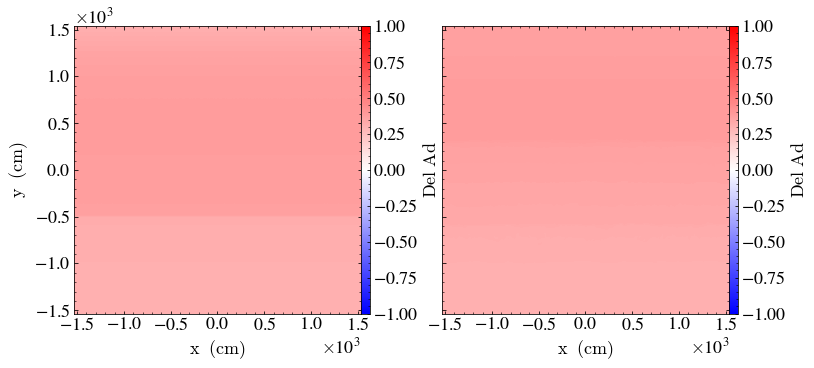

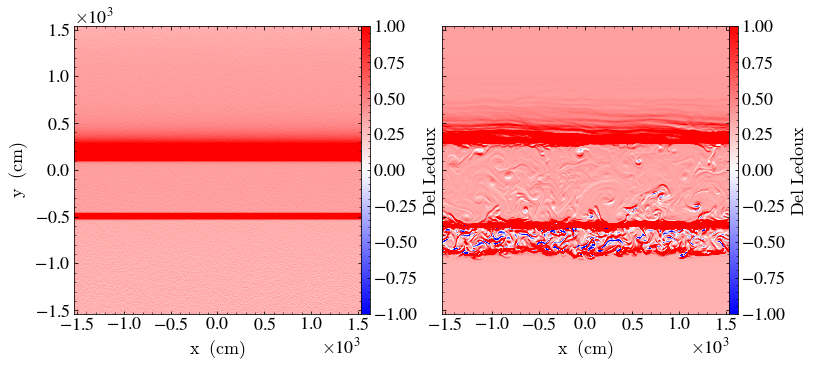

In [27]:
# convective grad

plotfiles = glob.glob(run_dir+"PLOTS/xrb*/convgrad")
plotfiles = [file for file in plotfiles if "old" not in file]
Nums = [int(file.split("/")[-2].split("_")[-1]) for file in plotfiles if ("after" not in file and "Init" not in file)]
Nlast = max(Nums)
ds1_grad = yt.load(run_dir+"PLOTS/xrb_0000000/convgrad", hint="maestro")
ds2_grad = yt.load(run_dir+"PLOTS/xrb_%07d/convgrad"%Nlast, hint="maestro")

# print(ds1.field_list)

compare_one_var('del',DS1=ds1_grad,DS2=ds2_grad, minimum=-1, maximum=1, cmap='bwr')
compare_one_var('del_ad',DS1=ds1_grad,DS2=ds2_grad, minimum=-1, maximum=1, cmap='bwr')
compare_one_var('del_ledoux',DS1=ds1_grad,DS2=ds2_grad, minimum=-1, maximum=1, cmap='bwr')

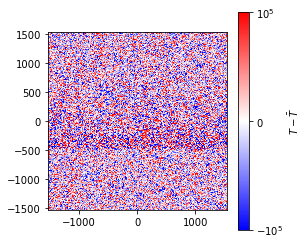

In [67]:
ds_init = yt.load(run_dir+"PLOTS/xrb_InitData", hint="maestro")

fig,ax = plt.subplots(1,1,figsize=(4,4))
slc = yt.SlicePlot(ds_init,'z','tpert')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
z = frb['tpert']
img = ax.imshow(z, origin="lower", extent=(-W/2,W/2,-H/2,H/2), cmap="bwr", vmin=-1e5, vmax=1e5)
cbar = plt.colorbar(img, ticks=[-1e5,0,1e5])
cbar.set_label(r"$T-\bar T$")
cbar.ax.set_yticklabels([r'$-10^5$', r'$0$', r'$10^5$'])

fig.savefig("gaussian_noise.png", bbox_inches="tight", dpi=500)

# Custom plots

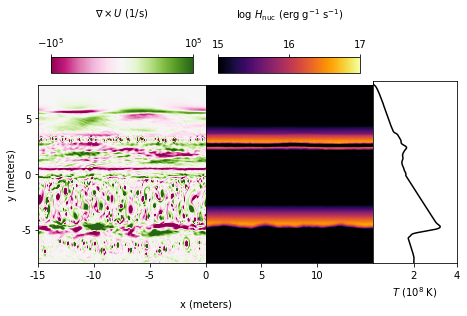

In [23]:
# vort on the left half, Hnuc on the right half, T profile in another panel

ds = ds2
W,H,_ = ds.domain_right_edge
nx,ny,_ = ds.domain_dimensions

Norm = (1,1,1)
Labels = (r"log $H_{\rm nuc}$ (erg g$^{-1}$ s$^{-1}$)",r"$\nabla\times U$ (1/s)")

Cmaps = ("inferno","PiYG")

fig,axes = plt.subplots(1,3,figsize=(9,7))
fig.subplots_adjust(wspace=0)

# vorticity
slc = yt.SlicePlot(ds,'z','vort')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
z = np.array(frb['vort'])/1e5
img = axes[0].imshow(z, origin="lower", extent=(-W/2,0,-H/2,H/2), cmap="PiYG", vmin=-1, vmax=1)

# divider = make_axes_locatable(axes[0])
# height = axes_size.AxesX(axes[0], aspect=1/15)
# width = axes_size.AxesY(axes[0], aspect=0.5)
# pad = axes_size.Fraction(0.5, height)
# cax1 = divider.append_axes("top", size=height, pad=pad)

r = 0.85 # width ratio of cbar to plot
pos = axes[0].get_position()
x0,y0,h,w = pos.x0,pos.y0,pos.height,pos.width
cax1 = fig.add_axes([x0+(1-r)*w/2, y0+0.8*h, w*r, h/20])

cbar = plt.colorbar(img, cax=cax1, orientation="horizontal", ticks=[-1,1])
cax1.xaxis.set_ticks_position("top")
cax1.set_xlabel(r"$\nabla\times U$ (1/s)")
cax1.xaxis.set_label_coords(0.5, 4)
cax1.set_xticks([-1,1],[r"$-10^5$",r"$10^5$"])

# Hnuc
slc = yt.SlicePlot(ds,'z','Hnuc')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
z = np.log10(np.maximum(frb['Hnuc'],1e-99))
img = axes[1].imshow(z, origin="lower", extent=(0,W/2,-H/2,H/2), cmap="inferno", vmin=15, vmax=17)

# divider = make_axes_locatable(axes[1])
# pad = axes_size.Fraction(0.5, height)
# cax2 = divider.append_axes("top", size=height, pad=pad,)

pos = axes[1].get_position()
x0,y0 = pos.x0,pos.y0
cax2 = fig.add_axes([x0+(1-r)*w/2, y0+0.8*h, w*r, h/20])

cbar = plt.colorbar(img, cax=cax2, orientation="horizontal")
cax2.xaxis.set_ticks_position("top")
cax2.set_xlabel(r"log $H_{\rm nuc}$ (erg g$^{-1}$ s$^{-1}$)")
cax2.xaxis.set_label_coords(0.5, 4)
cax2.set_xticks([15,16,17])





# axes[0].set_ylim([-800,600])
# axes[1].set_ylim([-800,600])
axes[0].set_ylim([-800,800])
axes[1].set_ylim([-800,800])
axes[0].set_yticks([-500,0,500],["-5","0","5"])
axes[1].set_yticks([])
axes[0].set_xlim([-1500,0])
axes[1].set_xlim([0,1500])
axes[0].set_xticks([-1500,-1000,-500],["-15","-10","-5"])
axes[1].set_xticks([0,500,1000],["0","5","10"])
axes[0].set_ylabel("y (meters)")
axes[0].set_xlabel("x (meters)")
axes[0].xaxis.set_label_coords(1., -0.2)



# Averages files
file = run_dir+"PLOTS/xrb_%07d"%Nlast+"/averages"   
# file = run_dir+"PLOTS/xrb_%07d"%0+"/averages"        
header = np.loadtxt(file, dtype='unicode', max_rows=1)
data = np.loadtxt(file, skiprows=1).T
z = data[0]

T = data[list(header).index('tfromp')]
axes[2].plot(T/1e8,z,color='k',lw=1.5)
axes[2].set_xlim([0.1,4])
axes[2].set_ylim([-800+H.v/2,800+H.v/2])
axes[2].set_yticks([])
axes[2].set_xlabel(r"$T$ ($10^8$ K)") 

pos = axes[2].get_position()
x0,y0 = pos.x0,pos.y0
# axes[2].set_aspect('equal')
# axes[2].set_position([x0, y0, w, w*16/15]) # set the same aspect ratio as other plots, defined by the x/y lims
axes[2].set_position([x0, y0+0.2, w/2, w*1.4]) # set the same aspect ratio as other plots, defined by the x/y lims



# fig.subplots_adjust(top=0.85)
# fig.suptitle(fr"time = {float(ds.current_time):8.5f} s")
# fig.savefig("sample_fig.png", bbox_inches="tight", facecolor="white", dpi=500)

yt : [INFO     ] 2023-08-29 08:53:42,861 xlim = 0.000000 3072.000000
yt : [INFO     ] 2023-08-29 08:53:42,862 ylim = 0.000000 3072.000000
yt : [INFO     ] 2023-08-29 08:53:42,864 xlim = 0.000000 3072.000000
yt : [INFO     ] 2023-08-29 08:53:42,865 ylim = 0.000000 3072.000000
yt : [INFO     ] 2023-08-29 08:53:42,866 Making a fixed resolution buffer of (('boxlib', 'X(h1)')) 800 by 800
yt : [INFO     ] 2023-08-29 08:53:43,196 Making a fixed resolution buffer of (X(h1)) 512 by 512
yt : [INFO     ] 2023-08-29 08:53:43,231 xlim = 0.000000 3072.000000
yt : [INFO     ] 2023-08-29 08:53:43,232 ylim = 0.000000 3072.000000
yt : [INFO     ] 2023-08-29 08:53:43,234 xlim = 0.000000 3072.000000
yt : [INFO     ] 2023-08-29 08:53:43,235 ylim = 0.000000 3072.000000
yt : [INFO     ] 2023-08-29 08:53:43,236 Making a fixed resolution buffer of (('boxlib', 'Hnuc')) 800 by 800
yt : [INFO     ] 2023-08-29 08:53:43,411 Making a fixed resolution buffer of (Hnuc) 512 by 512
yt : [INFO     ] 2023-08-29 08:53:43,4

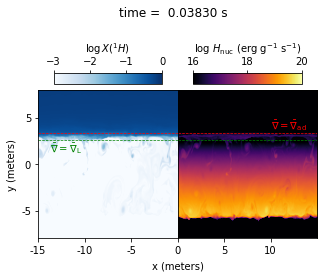

In [28]:
# X(H1) and log Hnuc (myplot1.py)

ds=ds2
W,H,_ = ds.domain_right_edge
nx,ny,_ = ds.domain_dimensions
x = np.linspace(-W.v/2,W.v/2,nx)
y = np.linspace(-H.v/2,H.v/2,ny)

# Create fig
fig,axes = plt.subplots(1,2,figsize=(5,4))
fig.subplots_adjust(wspace=0)

# h1
slc = yt.SlicePlot(ds,'z','X(h1)')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
z = np.log10(np.maximum(frb['X(h1)'],1e-99))
img = axes[0].imshow(z, origin="lower", extent=(-W/2,0,-H/2,H/2), cmap="Blues", vmin=-3, vmax=0)

r = 1.0 # width ratio of cbar to plot
pos = axes[0].get_position()
x0,y0,h,w = pos.x0,pos.y0,pos.height,pos.width
cax1 = fig.add_axes([x0+(1-r)*w/2, y0+0.87*h, w*r, h/20])

cbar = plt.colorbar(img, cax=cax1, orientation="horizontal", ticks=[-1,1])
cax1.xaxis.set_ticks_position("top")
cax1.set_xlabel(r"$\log X(^1{H})$")
cax1.xaxis.set_label_coords(0.5, 4)
cax1.set_xticks([-3,-2,-1,0])

# Hnuc
slc = yt.SlicePlot(ds,'z','Hnuc')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
z = np.log10(np.maximum(frb['Hnuc'],1e-99))
img = axes[1].imshow(z, origin="lower", extent=(0,W/2,-H/2,H/2), cmap="inferno", vmin=16, vmax=20)

pos = axes[1].get_position()
x0,y0 = pos.x0,pos.y0
cax2 = fig.add_axes([x0+(1-r)*w/2, y0+0.87*h, w*r, h/20])

cbar = plt.colorbar(img, cax=cax2, orientation="horizontal")
cax2.xaxis.set_ticks_position("top")
cax2.set_xlabel(r"log $H_{\rm nuc}$ (erg g$^{-1}$ s$^{-1}$)")
cax2.xaxis.set_label_coords(0.5, 4)
cax2.set_xticks([16,18,20])

axes[0].set_ylim([-800,800])
axes[1].set_ylim([-800,800])
axes[0].set_yticks([-500,0,500],["-5","0","5"])
axes[1].set_yticks([])
axes[0].set_xlim([-1500,0])
axes[1].set_xlim([0,1500])
axes[0].set_xticks([-1500,-1000,-500],["-15","-10","-5"])
axes[1].set_xticks([0,500,1000],["0","5","10"])
axes[0].set_ylabel("y (meters)")
axes[0].set_xlabel("x (meters)")
axes[0].xaxis.set_label_coords(1., -0.15)


# Streamplot
slc = yt.SlicePlot(ds,'z','velx')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
vx = np.array(frb['velx'])
slc = yt.SlicePlot(ds,'z','vely')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
vy = np.array(frb['vely'])

V = np.sqrt(vx**2+vy**2)
lw = V/V.max()

# axes[0].streamplot(x,y,vx,vy, color='k', density=2, linewidth=lw, arrowsize=0.7)
# axes[1].streamplot(x,y,vx,vy, color='k', density=2, linewidth=lw, arrowsize=0.7)


# Swz Ledoux boundaries from conv grad averages file
avg_fname = ds.filename + "/convgrad/averages"
header = np.loadtxt(avg_fname, dtype='unicode', max_rows=1)
# print(header)
data = np.loadtxt(avg_fname, skiprows=1).T
z = data[0]
z = (z-z[-1]/2) # center and convert to meters
del_ = data[list(header).index('del')]
del_ad = data[list(header).index('del_ad')]
del_l = data[list(header).index('del_ledoux')]

iswz = np.argwhere(np.logical_and(z > -5 , del_-del_ad < -0.2))[0]
plt.axvline(z[iswz], color='k', ls=':')
iled = np.argwhere(np.logical_and(z > -5 , del_-del_l < -0.2))[0]

for ax in axes:
    ax.axhline(z[iswz], color='r', ls='--', lw=0.7)
    ax.axhline(z[iled], color='g', ls='--', lw=0.7)

axes[1].text(+12e2,z[iswz]+90,r"$\bar\nabla=\bar\nabla_{\rm ad}$", color='r', ha='center', va='center')
axes[0].text(-12e2,z[iled]-90,r"$\bar\nabla=\bar\nabla_{\rm L}$", color='g', ha='center', va='center')


fig.suptitle(fr"time = {float(ds.current_time):8.5f} s", y=1.05)
fig.savefig("sample_fig.png", bbox_inches="tight", facecolor="white", dpi=500)

Text(0.5, 1.05, 'time =  0.03850 s')

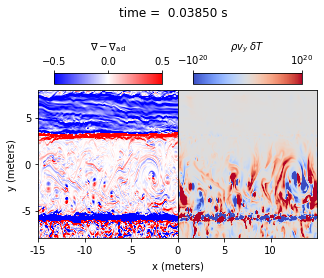

In [90]:
ds=ds2
W,H,_ = ds.domain_right_edge
nx,ny,_ = ds.domain_dimensions
x = np.linspace(-W.v/2,W.v/2,nx)
y = np.linspace(-H.v/2,H.v/2,ny)

# Create fig
fig,axes = plt.subplots(1,2,figsize=(5,4))
fig.subplots_adjust(wspace=0)

# del minus del ad
slc = yt.SlicePlot(ds,'z','ad_excess')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
z = frb['ad_excess']
img = axes[0].imshow(z, origin="lower", extent=(-W/2,0,-H/2,H/2), cmap="bwr", vmin=-0.5, vmax=0.5)

r = 1.0 # width ratio of cbar to plot
pos = axes[0].get_position()
x0,y0,h,w = pos.x0,pos.y0,pos.height,pos.width
cax1 = fig.add_axes([x0+(1-r)*w/2, y0+0.87*h, w*r, h/20])

cbar = plt.colorbar(img, cax=cax1, orientation="horizontal", ticks=[-1,1])
cax1.xaxis.set_ticks_position("top")
cax1.set_xlabel(r"$\nabla-\nabla_{\rm ad}$")
cax1.xaxis.set_label_coords(0.5, 4)
cax1.set_xticks([-0.5,0,0.5])

# heat flux
slc = yt.SlicePlot(ds,'z','rho')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
rho = frb['rho']

slc = yt.SlicePlot(ds,'z','vely')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
vy = frb['vely']

slc = yt.SlicePlot(ds,'z','tpert')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
dT = frb['tpert']

z = rho*vy*dT
# img = axes[1].imshow(z, origin="lower", extent=(0,W/2,-H/2,H/2), cmap="inferno", vmin=16, vmax=20)
img = axes[1].imshow(z, origin="lower", extent=(0,W/2,-H/2,H/2), cmap="coolwarm", vmin=-1e20, vmax=1e20)


pos = axes[1].get_position()
x0,y0 = pos.x0,pos.y0
cax2 = fig.add_axes([x0+(1-r)*w/2, y0+0.87*h, w*r, h/20])

cbar = plt.colorbar(img, cax=cax2, orientation="horizontal")
cax2.xaxis.set_ticks_position("top")
cax2.set_xlabel(r"$\rho v_y\;\delta T$")
cax2.xaxis.set_label_coords(0.5, 4)
cax2.set_xticks([-1e20,1e20],[r"$-10^{20}$","$10^{20}$"])

axes[0].set_ylim([-800,800])
axes[1].set_ylim([-800,800])
axes[0].set_yticks([-500,0,500],["-5","0","5"])
axes[1].set_yticks([])
axes[0].set_xlim([-1500,0])
axes[1].set_xlim([0,1500])
axes[0].set_xticks([-1500,-1000,-500],["-15","-10","-5"])
axes[1].set_xticks([0,500,1000],["0","5","10"])
axes[0].set_ylabel("y (meters)")
axes[0].set_xlabel("x (meters)")
axes[0].xaxis.set_label_coords(1., -0.15)


# Streamplot
slc = yt.SlicePlot(ds,'z','velx')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
vx = np.array(frb['velx'])
slc = yt.SlicePlot(ds,'z','vely')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
vy = np.array(frb['vely'])

V = np.sqrt(vx**2+vy**2)
lw = V/V.max()

# axes[0].streamplot(x,y,vx,vy, color='k', density=2, linewidth=lw, arrowsize=0.7)
# axes[1].streamplot(x,y,vx,vy, color='k', density=2, linewidth=lw, arrowsize=0.7)

fig.suptitle(fr"time = {float(ds.current_time):8.5f} s", y=1.05)

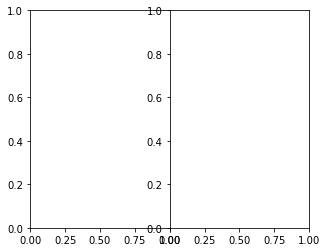

In [74]:
ds=ds2
W,H,_ = ds.domain_right_edge
nx,ny,_ = ds.domain_dimensions
x = np.linspace(-W.v/2,W.v/2,nx)
y = np.linspace(-H.v/2,H.v/2,ny)

# Create fig
fig,axes = plt.subplots(1,2,figsize=(5,4))
fig.subplots_adjust(wspace=0)

slc = yt.SlicePlot(ds,'z','rho')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
rho = frb['rho']

slc = yt.SlicePlot(ds,'z','tfromp')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
T = frb['tfromp']

slc = yt.SlicePlot(ds,'z','tpert')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
dT = frb['tpert']

slc = yt.SlicePlot(ds,'z','velx')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
vx = frb['velx']

slc = yt.SlicePlot(ds,'z','vely')
frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
vy = frb['vely']

# # h1
# slc = yt.SlicePlot(ds,'z','X(h1)')
# frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
# z = np.log10(np.maximum(frb['X(h1)'],1e-99))
# img = axes[0].imshow(z, origin="lower", extent=(-W/2,0,-H/2,H/2), cmap="Blues", vmin=-3, vmax=0)

# r = 1.0 # width ratio of cbar to plot
# pos = axes[0].get_position()
# x0,y0,h,w = pos.x0,pos.y0,pos.height,pos.width
# cax1 = fig.add_axes([x0+(1-r)*w/2, y0+0.87*h, w*r, h/20])

# cbar = plt.colorbar(img, cax=cax1, orientation="horizontal", ticks=[-1,1])
# cax1.xaxis.set_ticks_position("top")
# cax1.set_xlabel(r"$\log X(^1{H})$")
# cax1.xaxis.set_label_coords(0.5, 4)
# cax1.set_xticks([-3,-2,-1,0])

# # Hnuc
# slc = yt.SlicePlot(ds,'z','Hnuc')
# frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
# z = np.log10(np.maximum(frb['Hnuc'],1e-99))
# img = axes[1].imshow(z, origin="lower", extent=(0,W/2,-H/2,H/2), cmap="inferno", vmin=16, vmax=20)

# pos = axes[1].get_position()
# x0,y0 = pos.x0,pos.y0
# cax2 = fig.add_axes([x0+(1-r)*w/2, y0+0.87*h, w*r, h/20])

# cbar = plt.colorbar(img, cax=cax2, orientation="horizontal")
# cax2.xaxis.set_ticks_position("top")
# cax2.set_xlabel(r"log $H_{\rm nuc}$ (erg g$^{-1}$ s$^{-1}$)")
# cax2.xaxis.set_label_coords(0.5, 4)
# cax2.set_xticks([16,18,20])

# axes[0].set_ylim([-800,800])
# axes[1].set_ylim([-800,800])
# axes[0].set_yticks([-500,0,500],["-5","0","5"])
# axes[1].set_yticks([])
# axes[0].set_xlim([-1500,0])
# axes[1].set_xlim([0,1500])
# axes[0].set_xticks([-1500,-1000,-500],["-15","-10","-5"])
# axes[1].set_xticks([0,500,1000],["0","5","10"])
# axes[0].set_ylabel("y (meters)")
# axes[0].set_xlabel("x (meters)")
# axes[0].xaxis.set_label_coords(1., -0.15)


# # Streamplot
# slc = yt.SlicePlot(ds,'z','velx')
# frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
# vx = np.array(frb['velx'])
# slc = yt.SlicePlot(ds,'z','vely')
# frb = slc.data_source.to_frb(width=W,height=H,resolution=(nx,ny))
# vy = np.array(frb['vely'])

# V = np.sqrt(vx**2+vy**2)
# lw = V/V.max()

# axes[0].streamplot(x,y,vx,vy, color='k', density=2, linewidth=lw, arrowsize=0.7)
# axes[1].streamplot(x,y,vx,vy, color='k', density=2, linewidth=lw, arrowsize=0.7)

# fig.suptitle(fr"time = {float(ds.current_time):8.5f} s", y=1.05)